In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Analysis of the Gender Pay Gap in the UK   
 
## By Megan Dibble

- Dataset origin: 2017 mandatory requirement in UK 
    - For businesses > 250 employees   

- The "gender pay gap" is the difference between the average earnings of men and women, expressed relative to men’s earnings   
    - e.g. ‘women earn 15% less than men per hour’.

Two big questions:
1. Is there a gender pay gap in the UK overall? (i.e. is the mean pay gap percentage = 0 or not?)
2. Are there signficicant differences in the gender pay gap between industries?

Who cares?
- Females entering job market   
- Company executives   
- UK government   
- Equal pay advocates around the world   

Link to Data: https://data.gov.uk/dataset/54219db1-dd98-49d9-a383-a5978bb0aeb9/gender-pay-gap    


## Research Design

My hypothesis are:
1. There is indeed a significant, positive gender pay gap in the UK           

2. There are significant differences in the pay gap between industry groups  
    - Finance, Insurance and Real Estate has the highest gap   

Data is suited for experiment
 - no bias in reporting due to government requirement
 - large dataset representative of population

Chart used to determine the industries of SIC codes:
    
01000-09990	Agriculture, Forestry and Fishing   
10000-14990	Mining   
15000-17990	Construction   
18000-19990	not used   
20000-39990	Manufacturing   
40000-49990	Transportation, Communications, Electric, Gas and Sanitary service   
50000-51990	Wholesale Trade   
52000-59990	Retail Trade   
60000-67990	Finance, Insurance and Real Estate   
70000-89990	Services   
91000-97290	Public Administration   
99000-99990	Nonclassifiable     
    
for a complete list of the industries in each group: https://en.wikipedia.org/wiki/Standard_Industrial_Classification

## Audience 

This research will be valuable for UK citizens who are wanting to educate others on the gender pay gap. It will also be useful for businesses in the UK in the given industries, to see how they compare and evaluate their hiring/promotion strategies. Finally, it can be useful for females in the UK that have a choice in industries to go into, assuming that there is a significant difference in the pay gap between industries.

# A Quick Look at the Data

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

In [3]:
#explore the data
pay = pd.read_csv('UK Gender Pay Gap Data_05_06.csv',dtype = {'SicCodes':'str'})
pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10332 entries, 0 to 10331
Data columns (total 23 columns):
EmployerName                 10332 non-null object
Address                      10332 non-null object
CompanyNumber                8993 non-null object
SicCodes                     9763 non-null object
DiffMeanHourlyPercent        10332 non-null float64
DiffMedianHourlyPercent      10332 non-null float64
DiffMeanBonusPercent         10332 non-null float64
DiffMedianBonusPercent       10332 non-null float64
MaleBonusPercent             10332 non-null float64
FemaleBonusPercent           10332 non-null float64
MaleLowerQuartile            10332 non-null float64
FemaleLowerQuartile          10332 non-null float64
MaleLowerMiddleQuartile      10332 non-null float64
FemaleLowerMiddleQuartile    10332 non-null float64
MaleUpperMiddleQuartile      10332 non-null float64
FemaleUpperMiddleQuartile    10332 non-null float64
MaleTopQuartile              10332 non-null float64
FemaleTopQuar

In [4]:
pay.head()
#also, only .05% of SIC codes are null
#0 null values for DiffMeanHourlyPercent

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,49.2,49.2,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,"""Bryanston School"",Incorporated",False
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19, Smith's Place,\r\nLeith Walk,\r\nEdinburgh...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,74.6,10.3,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False
2,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,47.0,50.0,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False
3,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,48.0,30.0,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True
4,1879 EVENTS MANAGEMENT LIMITED,"The Sunderland Stadium Of Light,,\r\nSunderlan...",07743495,"56210,\r\n70229",13.4,8.1,41.4,43.7,8.7,3.2,...,50.6,22.8,77.2,58.2,41.8,https://www.safc.com/news/club-news/2018/march...,Jo Graham (Deputy HR Manager),250 to 499,1879 EVENTS MANAGEMENT LIMITED,False


In [5]:
pay.DiffMeanHourlyPercent.describe()

count    10332.000000
mean        14.372580
std         15.095341
min       -400.000000
25%          5.100000
50%         13.400000
75%         23.000000
max        159.000000
Name: DiffMeanHourlyPercent, dtype: float64

In [6]:
#checking percentage of null values
print(pay.isna().sum()/len(pay))

#only .05% of SIC codes are null, so the by industry analysis will not be too affected with this large of a dataset

EmployerName                 0.000000
Address                      0.000000
CompanyNumber                0.129597
SicCodes                     0.055072
DiffMeanHourlyPercent        0.000000
DiffMedianHourlyPercent      0.000000
DiffMeanBonusPercent         0.000000
DiffMedianBonusPercent       0.000000
MaleBonusPercent             0.000000
FemaleBonusPercent           0.000000
MaleLowerQuartile            0.000000
FemaleLowerQuartile          0.000000
MaleLowerMiddleQuartile      0.000000
FemaleLowerMiddleQuartile    0.000000
MaleUpperMiddleQuartile      0.000000
FemaleUpperMiddleQuartile    0.000000
MaleTopQuartile              0.000000
FemaleTopQuartile            0.000000
CompanyLinkToGPGInfo         0.259485
ResponsiblePerson            0.161537
EmployerSize                 0.000000
CurrentName                  0.000000
SubmittedAfterTheDeadline    0.000000
dtype: float64


## Analysis of Average Gender Pay Gap

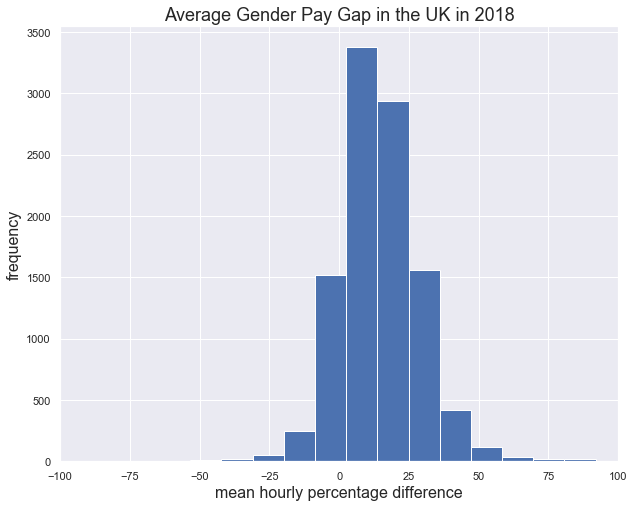

In [35]:
#visualize the mean percentage difference in hourly wages
plt.figure(figsize = (10,8))
plt.hist(pay.DiffMeanHourlyPercent, bins = 50)
plt.xlim(-100,100)
plt.xlabel('mean hourly percentage difference',size = 16)
plt.ylabel('frequency',size =16)
plt.title('Average Gender Pay Gap in the UK in 2018',size = 18)
plt.show();



It's important to note here that a positive value indicates that at a given company, men earn __ % more on average per hour than women.

In [8]:
print(stats.describe(pay.DiffMeanHourlyPercent))

DescribeResult(nobs=10332, minmax=(-400.0, 159.0), mean=14.372580332946187, variance=227.86932359000323, skewness=-2.379194164173365, kurtosis=70.27426647650553)


Is the data normal? No

- Kurtosis = 70.3 so the peak of the data is too sharp to be normal
- The Wilcoxon test also supports that the data is not normal

So, we will look at the median rather than the mean

In [9]:
w, p = stats.wilcoxon(pay.DiffMeanHourlyPercent.dropna())
print('The p-value is {}'.format(p))

The p-value is 0.0


This leads us to reject the null hypothesis and conclude that the data does not follow a normal distribution. Therefore, the median is a more robust measure of center for this data.

The median hourly pay gap is 13.3%.

Is this significant? Or is the data so spread out that this is meaningless?   
- Calculated the confidence interval using standard error
- Found the median is between 13.1% and 13.6%

It is significant!

In [20]:
from scipy.stats import t, sem
confidence = .95
n = len(pay.DiffMeanHourlyPercent)
median = pay.DiffMeanHourlyPercent.median()
var = pay.DiffMeanHourlyPercent.var()
se = sem(pay.DiffMeanHourlyPercent)
critical_val = t.ppf(confidence,n-1)
h = critical_val * se
CI = median - h, median + h

In [21]:
print(median - h, median + h)

13.155703674463481 13.64429632553652


What could be some of the reasons for this?
- Difference in the number of men and women in higher paying positions at the same company
- Gender bias in hiring/promotions
- Lack of qualified women applicants to higher paying roles


## Analysis of Gender Pay Gap by Industry Groups

In [14]:
#sectioning off data
mining = np.arange(10000,15000).astype(str).tolist()
mining_pay = pay[pay['SicCodes'].isin(mining)].DiffMeanHourlyPercent

construction = np.arange(15000,18000).astype(str).tolist()
construction_pay = pay[pay['SicCodes'].isin(construction)].DiffMeanHourlyPercent

mfg = np.arange(20000,40000).astype(str).tolist()
mfg_pay = pay[pay['SicCodes'].isin(mfg)].DiffMeanHourlyPercent

tcegs = np.arange(40000,50000).astype(str).tolist() #Transportation, Communications, Electric, Gas and Sanitary service
tcegs_pay = pay[pay['SicCodes'].isin(tcegs)].DiffMeanHourlyPercent

wholesale = np.arange(50000,52000).astype(str).tolist() 
wholesale_pay = pay[pay['SicCodes'].isin(wholesale)].DiffMeanHourlyPercent

retail = np.arange(52000,60000).astype(str).tolist() 
retail_pay = pay[pay['SicCodes'].isin(retail)].DiffMeanHourlyPercent

finance = np.arange(60000,70000).astype(str).tolist()
finance_pay = pay[pay['SicCodes'].isin(finance)].DiffMeanHourlyPercent

services = np.arange(70000,90000).astype(str).tolist()
services_pay = pay[pay['SicCodes'].isin(services)].DiffMeanHourlyPercent

admin = np.arange(91000,97300).astype(str).tolist()
admin_pay = pay[pay['SicCodes'].isin(admin)].DiffMeanHourlyPercent

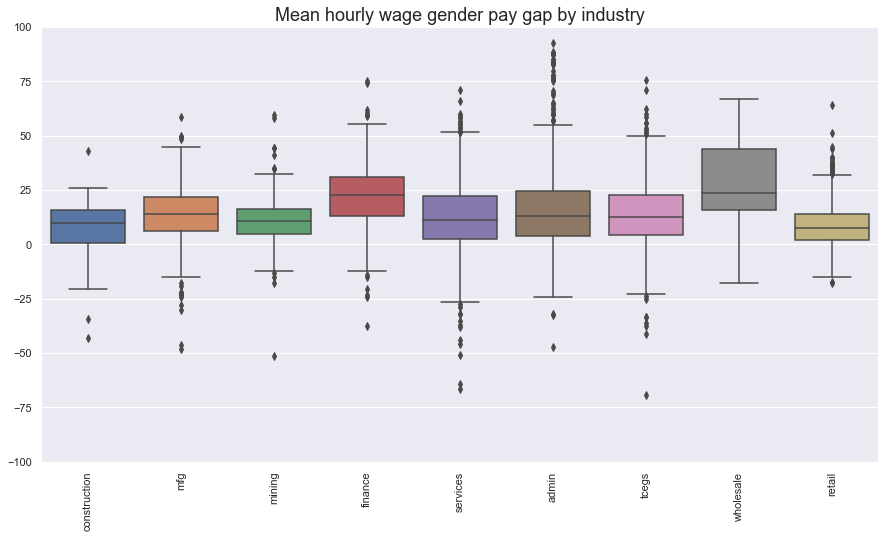

In [27]:
#visualize the data
import seaborn as sns
sns.set()
plt.figure(figsize=(15,8))
f = sns.boxplot( data = [construction_pay,mfg_pay,mining_pay,finance_pay, services_pay, admin_pay,tcegs_pay,wholesale_pay,retail_pay ] );
f.set(xticklabels=['construction','mfg','mining','finance','services','admin','tcegs','wholesale','retail'],ylim=(-100,100))
plt.title ('Mean hourly wage gender pay gap by industry',size = 18)
plt.setp(f.get_xticklabels(), rotation=90);


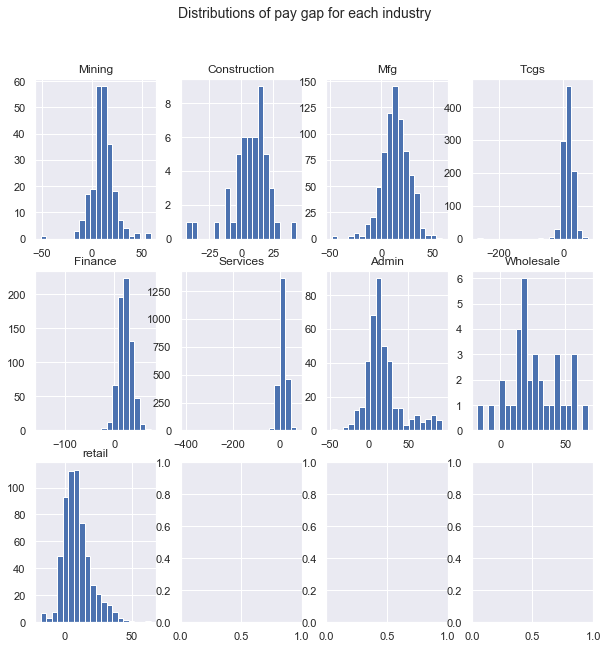

In [33]:
#checking if variables are normally distributed
fig, axs = plt.subplots(3, 4, figsize=(10,10))
axs[0,0].hist(mining_pay,bins=20)
axs[0,0].set_title('Mining')
axs[0,1].hist(construction_pay,bins=20)
axs[0,1].set_title('Construction')
axs[0,2].hist(mfg_pay,bins=20)
axs[0,2].set_title('Mfg')
axs[0,3].hist(tcegs_pay,bins=20)
axs[0,3].set_title('Tcgs')
axs[1,0].hist(finance_pay,bins=20)
axs[1,0].set_title('Finance')
axs[1,1].hist(services_pay,bins=20)
axs[1,1].set_title('Services')
axs[1,2].hist(admin_pay,bins=20)
axs[1,2].set_title('Admin')
axs[1,3].hist(wholesale_pay,bins=20)
axs[1,3].set_title('Wholesale')
axs[2,0].hist(retail_pay,bins=20)
axs[2,0].set_title('retail')
fig.suptitle('Distributions of pay gap for each industry',size=14)

plt.show();

In [17]:
#since the distributions do not all look normal, running the kruskal test to test if the distributions are the same
stats.kruskal(construction_pay,mfg_pay,mining_pay,finance_pay,services_pay,admin_pay,wholesale_pay)

KruskalResult(statistic=295.9534734351328, pvalue=6.0220766557764305e-61)

Distributions do not all look normal
- Ran the kruskal test to test if the distributions are the same

Concluded: at least one variable is from a different distribution (has a different median)

In [18]:
import scikit_posthocs as sp

In [32]:
#dunn's test for pairwise comparison for non-parametric distributions
#my hypothesis was that the finance industry group has a significantly higher pay gap than other industry groups
#look in the last column to see the p-values for the finance wage gap compared to other groups
results = sp.posthoc_dunn([construction_pay,mfg_pay,mining_pay,tcegs_pay,services_pay,admin_pay,wholesale_pay,retail_pay,finance_pay], p_adjust = 'holm')
results


,1,2,3,4,5,6,7,8,9
1,-1.000000e+00,3.278758e-02,1.000000e+00,7.350048e-02,2.148541e-01,3.278758e-02,1.520001e-05,1.000000e+00,1.841413e-10
2,3.278758e-02,-1.000000e+00,2.263707e-02,1.000000e+00,2.460801e-02,1.000000e+00,3.420259e-03,6.268060e-14,3.363203e-25
3,1.000000e+00,2.263707e-02,-1.000000e+00,8.620554e-02,8.086713e-01,3.278758e-02,2.156674e-05,1.293741e-01,8.821759e-25
4,7.350048e-02,1.000000e+00,8.620554e-02,-1.000000e+00,2.105373e-01,1.000000e+00,1.044459e-03,1.856375e-12,6.213493e-34
5,2.148541e-01,2.460801e-02,8.086713e-01,2.105373e-01,-1.000000e+00,8.620554e-02,9.986643e-05,1.561278e-09,1.837507e-56
6,3.278758e-02,1.000000e+00,3.278758e-02,1.000000e+00,8.620554e-02,-1.000000e+00,5.757766e-03,1.546213e-10,1.013457e-16
7,1.520001e-05,3.420259e-03,2.156674e-05,1.044459e-03,9.986643e-05,5.757766e-03,-1.000000e+00,1.452294e-08,1.000000e+00
8,1.000000e+00,6.268060e-14,1.293741e-01,1.856375e-12,1.561278e-09,1.546213e-10,1.452294e-08,-1.000000e+00,8.900983e-70
9,1.841413e-10,3.363203e-25,8.821759e-25,6.213493e-34,1.837507e-56,1.013457e-16,1.000000e+00,8.900983e-70,-1.000000e+00


Ran Dunn's test on all of the variables
- there is a significant difference between the median of the finance pay gap and all other industry groups, with the exception of the wholesale trade industry group.   
   
From the box plot a few slides back, we can conclude that the pay gap in the finance group is indeed higher than all of the other groups besides wholesale trade.


# Conclusion

My hypothesis were:
1. There is indeed a significant, positive gender pay gap in the UK (meaning males earn more than females)   
2. There are significant differences in the pay gap between industries, with Finance, Insurance and Real Estate    having the largest gap   

The first hypothesis was correct, while the second was mostly correct

### Recommendations

1. Collect more data
   
2. Analyze trends over time
  
3. Females applying to or currently in wholesale trade or finacnce sectors, be cognizant and report any discrimination experienced    
    
4. For further analysis, could compare companies of different sizes (with this dataset)

    - segment pay gap by "rank" in the company
    - if possible, the average ratio of female to male candidates 
    
    - government can implement policy changes or incentives accordingly  
    - businesses can adjust accordingly


## Thank you for listening!